<a href="https://colab.research.google.com/github/Cp557/nasa_spacecraft_detection/blob/main/evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluation of Spacecraft Detection Model

This notebook performs the evaluation of the trained YOLOv8 model for spacecraft detection:

1. **Model Loading**: Load the trained YOLOv8 model.
2. **Test Data Setup**: Set up directories for test images and labels.
3. **Model Inference**: Run the model on sample test images and visualize results.
4. **Evaluation Metrics**: Calculate Jaccard Index (IoU) for model predictions.
5. **Full Evaluation**: Evaluate the model on the entire test set.
6. **Results Analysis**: Display evaluation results and visualize failed detections.

Key functions:
- `calculate_jaccard_index()`: Compute IoU between true and predicted bounding boxes.
- `create_mask()`: Create binary masks from bounding box coordinates.
- `evaluate_model()`: Run full evaluation on the test set.

This notebook provides a comprehensive evaluation of the model's performance, including average Jaccard Index and analysis of failed detections.

In [ ]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 640.2 kB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_6

In [ ]:
import os
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, clear_output
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the trained YOLO model
model = YOLO('/content/drive/MyDrive/Coding/detection/runs/detect/train/weights/best.pt')

# Set up directories for test images and labels
test_images_dir = '/content/drive/MyDrive/Coding/detection/test/images'
test_labels_dir = '/content/drive/MyDrive/Coding/detection/test/labels'
image_files = [f for f in os.listdir(test_images_dir)]



image 1/1 /content/drive/MyDrive/Coding/detection/test/images/9e47d0b60752e0e7b87a39adf21782df.png: 512x640 1 spacecraft, 156.8ms
Speed: 3.5ms preprocess, 156.8ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


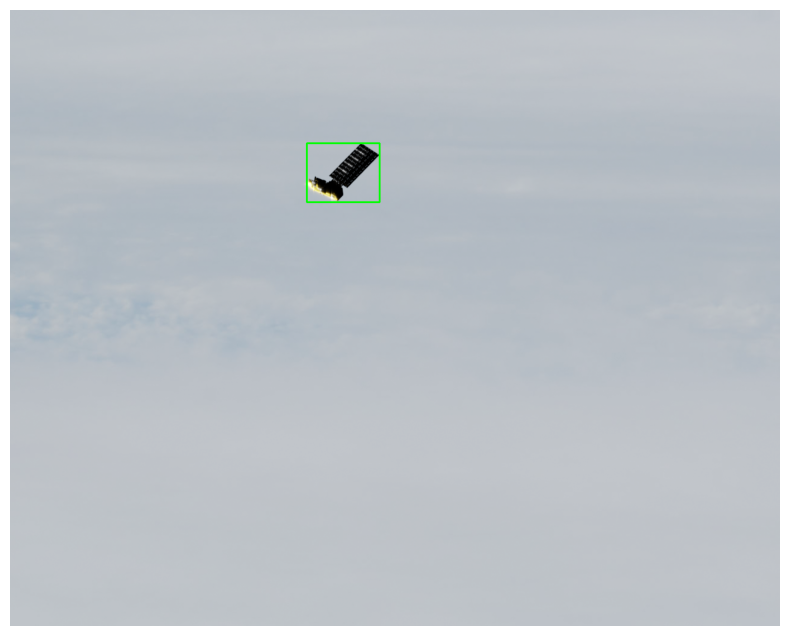


image 1/1 /content/drive/MyDrive/Coding/detection/test/images/9e616ad6049b49f3d9fbd70fafd08e64.png: 512x640 1 spacecraft, 182.1ms
Speed: 3.5ms preprocess, 182.1ms inference, 0.8ms postprocess per image at shape (1, 3, 512, 640)


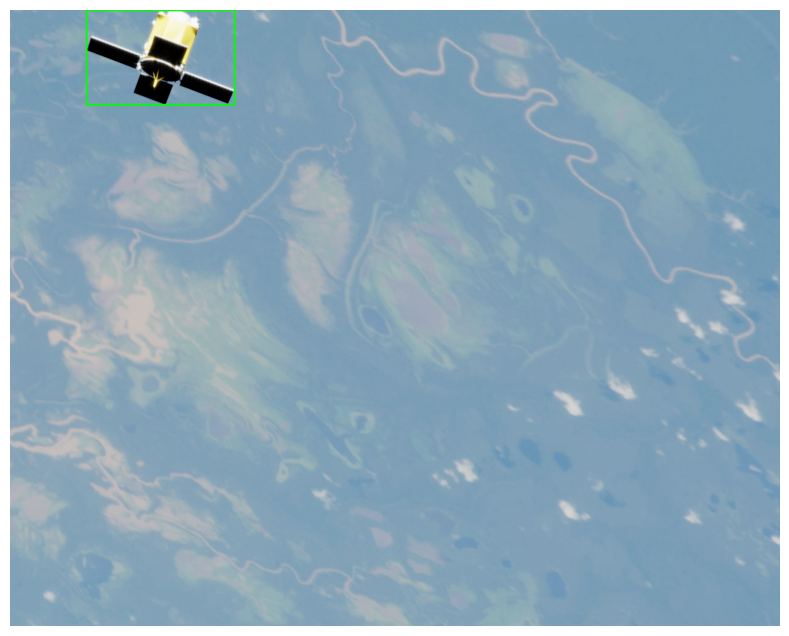


image 1/1 /content/drive/MyDrive/Coding/detection/test/images/9ec6bf546c55fb6588f708cd68b280bb.png: 512x640 1 spacecraft, 212.5ms
Speed: 3.5ms preprocess, 212.5ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 640)


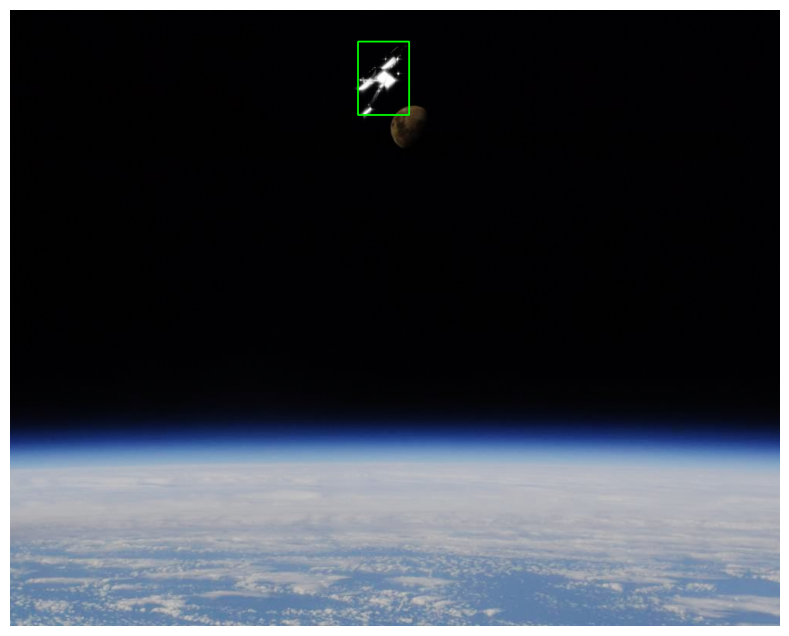


image 1/1 /content/drive/MyDrive/Coding/detection/test/images/9ec94803cc3a904a6163e14c4a3f641f.png: 512x640 1 spacecraft, 211.3ms
Speed: 3.4ms preprocess, 211.3ms inference, 0.8ms postprocess per image at shape (1, 3, 512, 640)


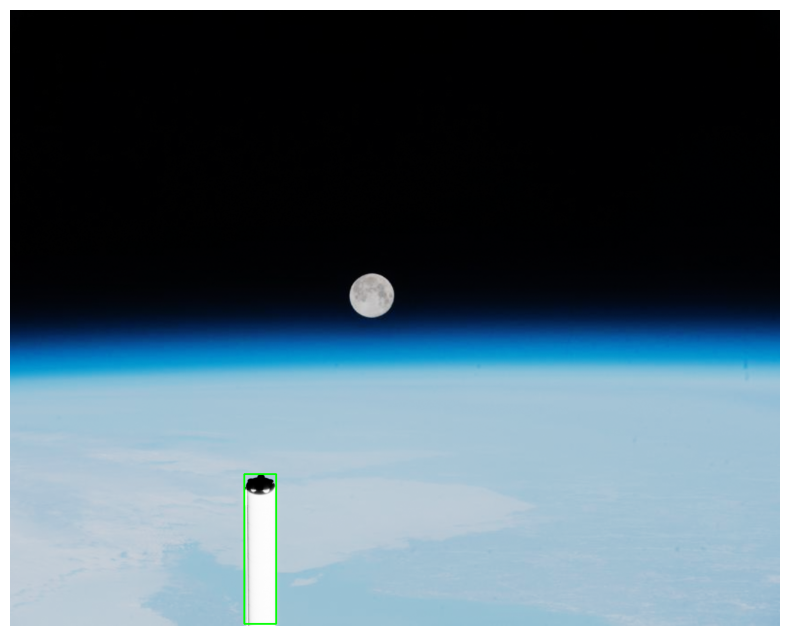


image 1/1 /content/drive/MyDrive/Coding/detection/test/images/9f2b79ded59b857e0379278b4a5a044a.png: 512x640 1 spacecraft, 282.7ms
Speed: 3.3ms preprocess, 282.7ms inference, 1.1ms postprocess per image at shape (1, 3, 512, 640)


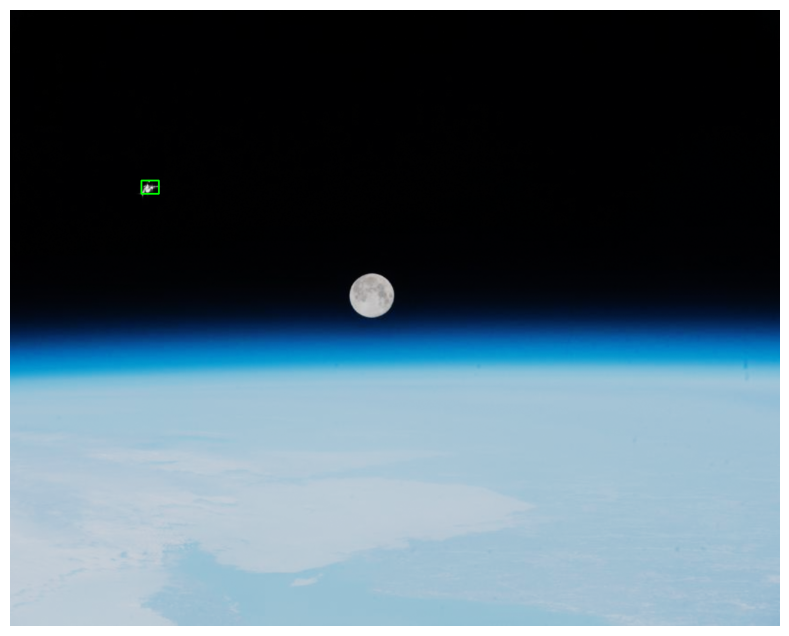

In [ ]:
for image_file in image_files[2:7]:
    image_path = os.path.join(test_images_dir, image_file)
    results = model(image_path)

    for r in results:
        # Get the original image
        im_array = cv2.imread(image_path)

        # Draw bounding boxes without labels
        for box in r.boxes:
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
            cv2.rectangle(im_array, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

        # Convert BGR to RGB
        im = cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB)

        # Display the image
        plt.figure(figsize=(12, 8))
        plt.imshow(im)
        plt.axis('off')
        plt.show()

In [ ]:
# Function to calculate Jaccard index (IoU) between two masks
def calculate_jaccard_index(true_mask, pred_mask):
    intersection = np.logical_and(true_mask, pred_mask)
    union = np.logical_or(true_mask, pred_mask)
    jaccard_index = np.sum(intersection) / np.sum(union)
    return jaccard_index

# Function to create a binary mask from bounding box coordinates
def create_mask(img_shape, bbox, is_yolo_format=True):
    mask = np.zeros(img_shape[:2], dtype=bool)
    if is_yolo_format:
        x, y, w, h = bbox
        img_h, img_w = img_shape[:2]
        x1, y1 = int((x - w/2) * img_w), int((y - h/2) * img_h)
        x2, y2 = int((x + w/2) * img_w), int((y + h/2) * img_h)
    else:
        x1, y1, x2, y2 = map(int, bbox)
    mask[y1:y2, x1:x2] = True
    return mask

# Function to evaluate the model on the test set
def evaluate_model(model, test_images_dir, test_labels_dir, limit=None):
    jaccard_scores = []
    no_detection_count = 0
    unprocessed_images = []

    image_files = [f for f in os.listdir(test_images_dir) if f.endswith('.png')]

    if limit is not None:
        image_files = image_files[:limit]

    for img_file in image_files:
        img_path = os.path.join(test_images_dir, img_file)
        label_path = os.path.join(test_labels_dir, os.path.splitext(img_file)[0] + '.txt')

        img = cv2.imread(img_path)
        results = model(img, verbose=False)

        # Read true bounding box from label file
        with open(label_path, 'r') as f:
            true_bbox = list(map(float, f.read().strip().split()[1:]))

        true_mask = create_mask(img.shape, true_bbox, is_yolo_format=True)

        if len(results[0].boxes) > 0:
            pred_bbox = results[0].boxes[0].xyxy[0].cpu().numpy()
            pred_mask = create_mask(img.shape, pred_bbox, is_yolo_format=False)
            jaccard = calculate_jaccard_index(true_mask, pred_mask)
            jaccard_scores.append(jaccard)
        else:
            no_detection_count += 1
            unprocessed_images.append(img_file)

    return jaccard_scores, no_detection_count, unprocessed_images

In [ ]:
# Evaluate the model
jaccard_scores, no_detection_count, unprocessed_images = evaluate_model(model, test_images_dir, test_labels_dir)


In [ ]:
print(f"\nEvaluation complete.")
print(f"Total images processed: {len(jaccard_scores) + no_detection_count}")
print(f"Images with detections: {len(jaccard_scores)}")
print(f"Images with no detections: {no_detection_count}")
print(f"Average Jaccard Index: {np.mean(jaccard_scores):.4f}")


Evaluation complete.
Total images processed: 2064
Images with detections: 1971
Images with no detections: 93
Average Jaccard Index: 0.8703


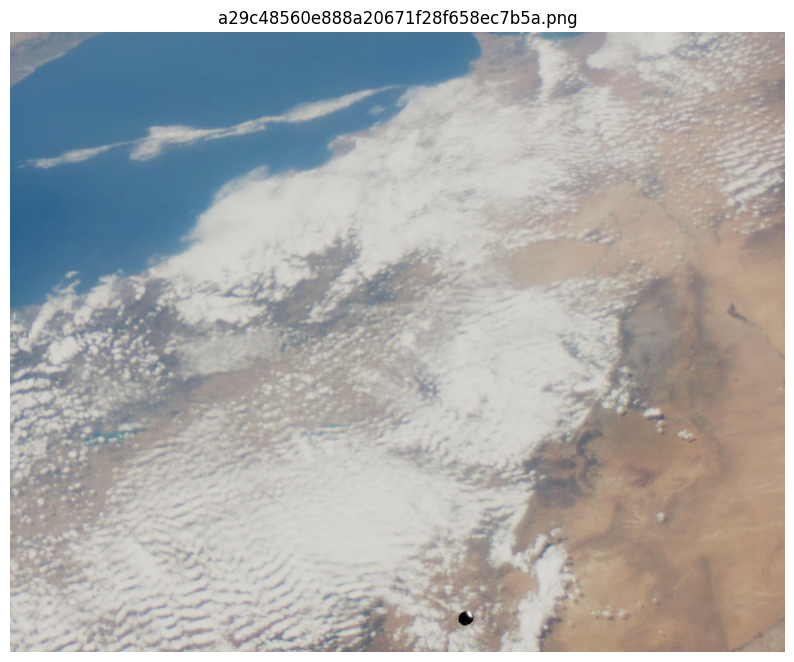

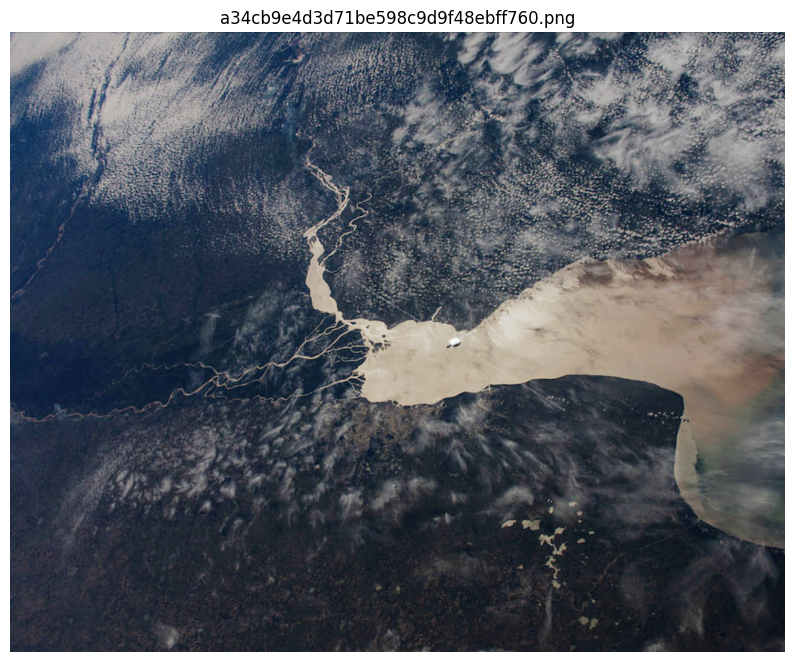

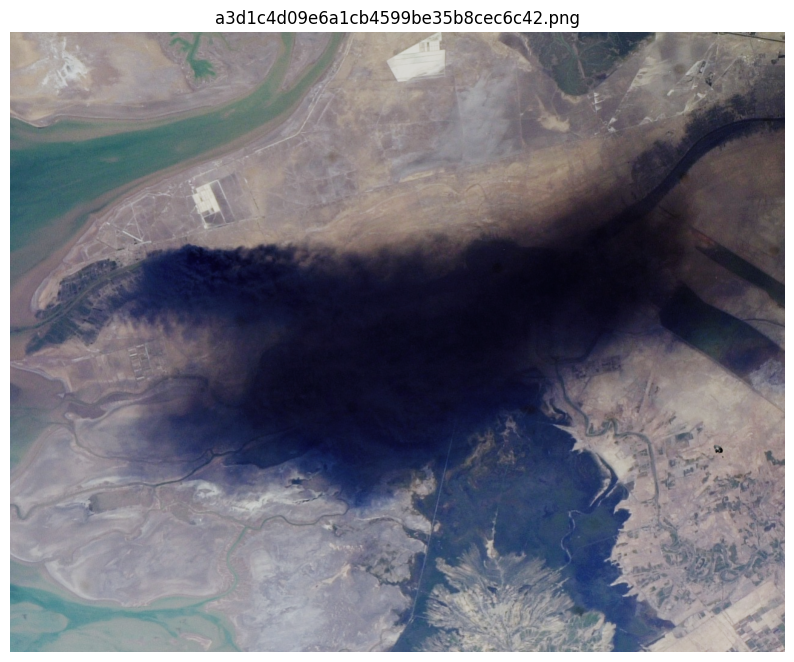

In [ ]:
# Display some of the images where no detection was made
for img in unprocessed_images[:3]:
    img_path = os.path.join(test_images_dir, img)
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.title(img)
    plt.axis('off')
    plt.show()